In [3]:
# load the data and packages needed
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# load the dataset
spam_data = pd.read_csv('spam.csv')

In [4]:
# Splitting Dataset into two parts train and testing
# Training Set = 1000
# Test Set = 3601

from sklearn.model_selection import train_test_split
spam_test_set, spam_training_set = train_test_split(spam_data, test_size=1000,random_state=42)

In [5]:
# Creating Training and Test Targets
spam_training_data, spam_training_target = spam_training_set[["make","address","all","3d","our","over","remove","internet","order","mail","receive","will","people","report","addresses","free","business","email","you","credit","your","font","0","money","hp","hpl","george","650","lab","labs","telnet","857","data","415","85","technology","1999","parts","pm","direct","cs","meeting","original","project","re","edu","table","conference","semicol","paren","bracket","bang","dollar","pound","cap_avg","cap_long","cap_total"]], spam_training_set["Class"]

spam_test_data, spam_test_target = spam_test_set[["make","address","all","3d","our","over","remove","internet","order","mail","receive","will","people","report","addresses","free","business","email","you","credit","your","font","0","money","hp","hpl","george","650","lab","labs","telnet","857","data","415","85","technology","1999","parts","pm","direct","cs","meeting","original","project","re","edu","table","conference","semicol","paren","bracket","bang","dollar","pound","cap_avg","cap_long","cap_total"]], spam_test_set["Class"]

In [6]:
# Create Classifier Objects

#clf_ad = AdaBoostClassifier(n_estimators = 1000, base_estimator = clf_dt)
#clf_rf = RandomForestClassifier(n_estimators = 1000, max_features = 'sqrt')
clf_dt = DecisionTreeClassifier(criterion="entropy")
clf_lr = LogisticRegression(max_iter=1000)
clf_gnb = GaussianNB()
fused_model = VotingClassifier(estimators = [('DT', clf_dt),('LR',clf_lr),('GNB',clf_gnb)], voting ='hard')

fused_model.fit(spam_training_data,spam_training_target)
spam_test_target_predict = fused_model.predict(spam_test_data)




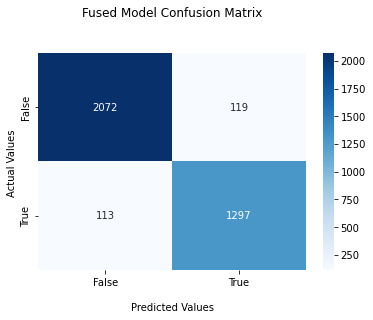

In [9]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(spam_test_target,spam_test_target_predict)
import seaborn as sns
image = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')

image.set_title('Fused Model Confusion Matrix\n\n');
image.set_xlabel('\nPredicted Values')
image.set_ylabel('Actual Values ');

image.xaxis.set_ticklabels(['False','True'])
image.yaxis.set_ticklabels(['False','True'])

plt.show()

#classification_report(iris_test_target,iris_test_target_predict)
#accuracy_score(iris_test_target,iris_test_target_predict)


In [8]:
tree.plot_tree(clf)

NameError: name 'clf' is not defined